### Student Information
Name: Dylan Sienatra 施威任

Student ID: 110006232

GitHub ID: DylanSie

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__.

## Second Part

### Initializing

In [315]:
### Begin Assignment Here
# Mount Drive
from google.colab import drive
import os
drive.mount('/content/drive')

# Helper Files
!cp /content/drive/MyDrive/DataMiningHomework/helpers/data_mining_helpers.py /content
import data_mining_helpers as dmh



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [316]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2. Data Preparation

In [317]:
import pandas as pd
# Downloading the new dataset
df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [318]:
# Check the data
df[0:5]

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [319]:
# Display all types of sentiment
df.sentiment.unique()

array(['not nostalgia', 'nostalgia'], dtype=object)

In [320]:
# Display the rows of data available
len(df)

1500

In [321]:
# Outputs the first comment of the data
print(df.comment[0])

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.


### 3. Data Transformation

In [322]:
# Adding category to dataframe where 0 means not nostalgia and 1 means nostalgia
df['category'] = df['sentiment'].apply(lambda x: 1 if x.lower() == 'nostalgia' else 0)
df.head(3)

,sentiment,comment,category
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1


In [323]:
#Sorting based on category column
df_sort = df.sort_values(by = 'category')
df_sort[:5]


,sentiment,comment,category
0,not nostalgia,He was a singer with a golden voice that I lov...,0
602,not nostalgia,One of the few cases where lyrics in a new lan...,0
603,not nostalgia,The only best singer for ever more with the te...,0
604,not nostalgia,This is my favorite Dean song. When I feel a b...,0
605,not nostalgia,Love this song. So many new versions of it. Wh...,0


### 4. Data Mining using Pandas

#### 4.1 Missing Values

In [324]:
# Try to find if the data has any missing values (it looks clean already)
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


#### 4.2 Dealing with Duplicate Data

In [325]:
# Check the data if there is duplicate
print(sum(df.duplicated()))
len(df)

1


1500

In [326]:
# Drop the second duplicate but we will keep the first data
df.drop_duplicates(keep = 'first', inplace = True)
len(df)

1499

### 5. Data Preprocessing

#### 5.1 Sampling

In [327]:
# Sample 1000 of the dataset randomly
df_sample = df.sample(n=1000)
len(df_sample)

1000

In [328]:
df_sample[0:4]

,sentiment,comment,category
941,nostalgia,So nostalgic for me! My mom used to sing this ...,1
1169,nostalgia,I was a barman in the UK when it came out and ...,1
503,not nostalgia,Would have been fantastic to spend a nice even...,0
545,not nostalgia,A wonderful tune played in the movie Blood&Fle...,0


In [329]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Category Distribution'}, xlabel='sentiment'>

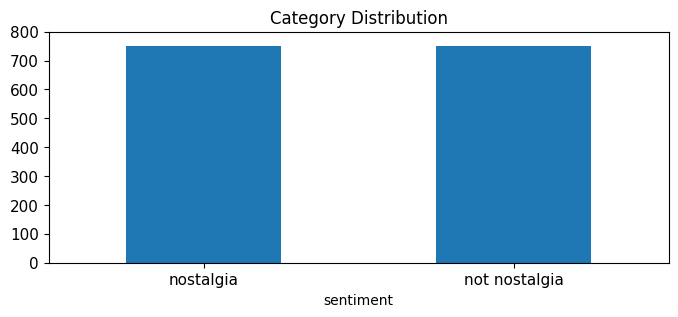

In [330]:
print(df.sentiment.value_counts())

# Plot barchart for df
df.sentiment.value_counts().plot(kind = 'bar',
                                 title = 'Category Distribution',
                                 ylim = [0, 800],
                                 rot = 0, fontsize = 11, figsize=(8, 3))



sentiment
not nostalgia    505
nostalgia        495
Name: count, dtype: int64


<Axes: title={'center': 'Category Distribution'}, xlabel='sentiment'>

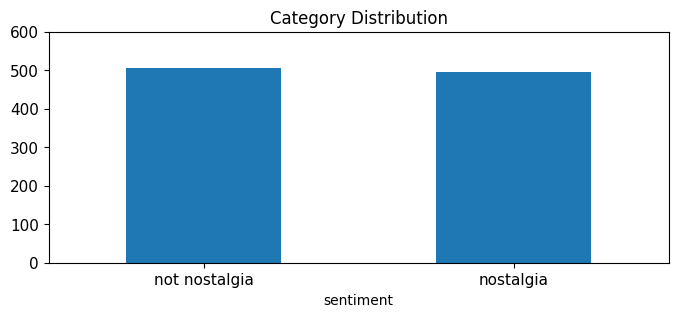

In [331]:
# Plot barchart for df_sample
print(df_sample.sentiment.value_counts())
df_sample.sentiment.value_counts().plot(kind = 'bar',
                                 title = 'Category Distribution',
                                 ylim = [0, 600],
                                 rot = 0, fontsize = 11, figsize=(8, 3))

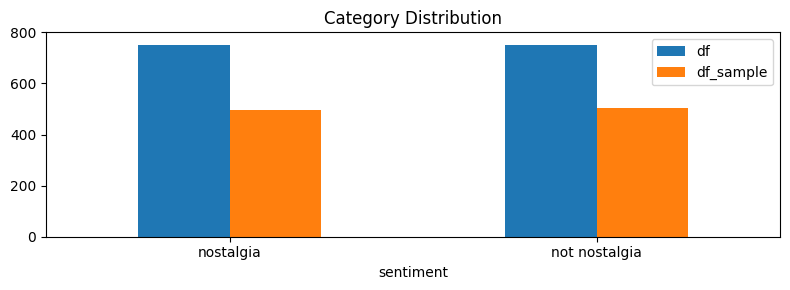

In [332]:
combine = pd.DataFrame({
    'df': df.sentiment.value_counts(),
    'df_sample': df_sample.sentiment.value_counts()
})
# Then we can plot the bar

ax = combine.plot(
    kind = 'bar',
    figsize = (8, 3)
)

# We set the title as Category Distribution like the previous example with a ylim of 0 to 700
ax.set_title('Category Distribution')
ax.set_ylim([0, 800])
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# The xticks is to make the label in x axis to be horizontal


#### 5.2 Feature Creation

In [333]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [334]:
# Create a new column in the dataset for unigrams (tokenized comment)
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

In [335]:
df[0:4]

,sentiment,comment,category,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [336]:
list(df[0:1]["unigrams"])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

#### 5.3 Feature Subset Selection

In [337]:
# Generate document-term matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [338]:
count_vect.get_feature_names_out()[1598]

'he'

In [339]:
# Shape of the matrix
df_counts.shape

(1499, 3730)

In [340]:
# Sparse to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [341]:
# Feature Names of the vectorizer
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [342]:
# Heat map of term-document matrix x = first twenty features, y = document index
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray() #df_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

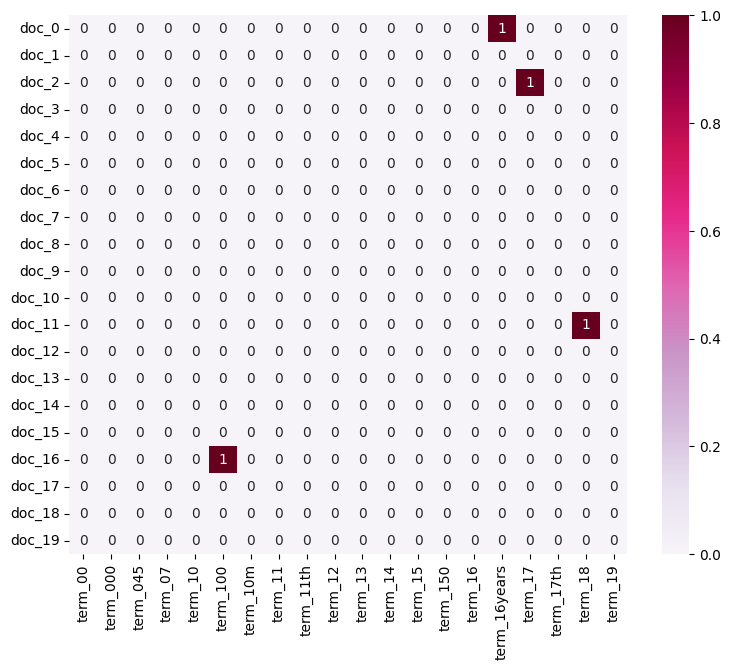

In [343]:
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9,7))
ax = sns.heatmap(df_todraw,
                 cmap = "PuRd",
                 vmin = 0, vmax = 1, annot = True)

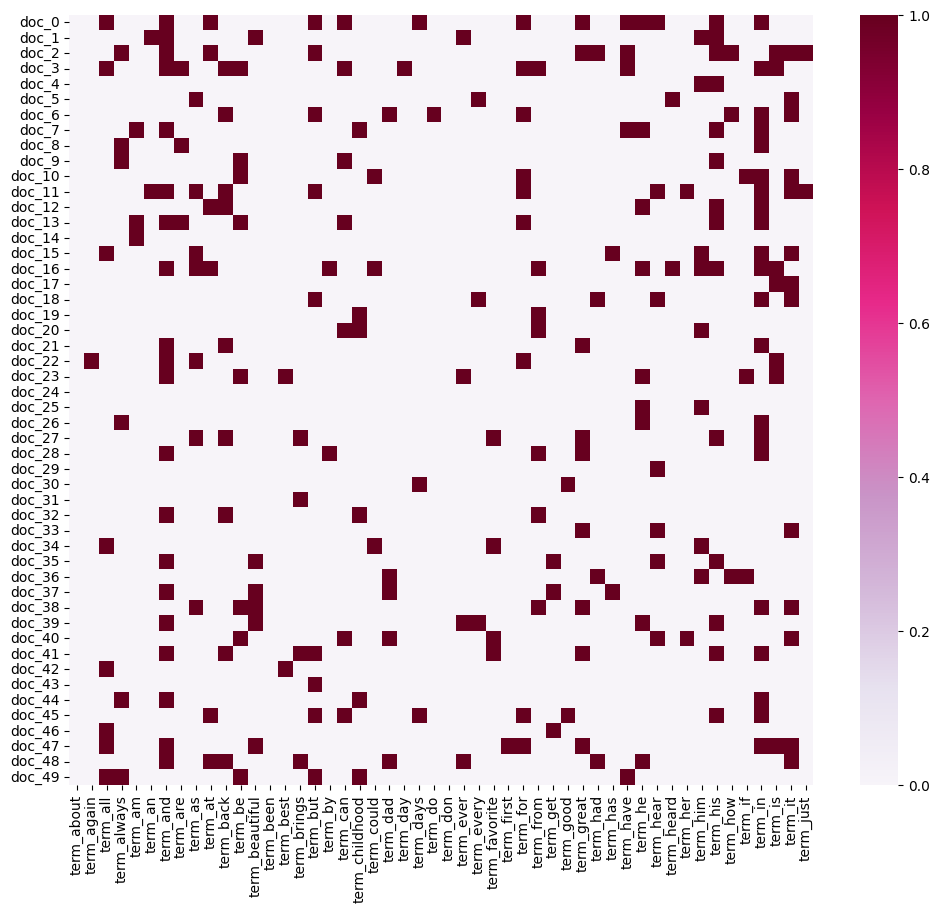

In [344]:
# The methods that I use is sampling and filtering, so I use a filter to ignore terms that appear in less than 50 documents
# I also sampled to take the first 50 terms and the first 50 documents so we can take a closer look
# filtering to ignore terms that appears in less than 50 documents
count_vect_freq = CountVectorizer(min_df = 50)
df_counts_filtered = count_vect_freq.fit_transform(df.comment)
filtered_feature_names = count_vect_freq.get_feature_names_out()
df_counts_filtered_array = df_counts_filtered[0:50, 0:50].toarray() #50 documents 50 terms

plot_x_filtered = ["term_" + str(i) for i in filtered_feature_names[0:50]]
plot_y_filtered = ["doc_" + str(i) for i in list(df.index)[0:50]]

df_filtered = pd.DataFrame(df_counts_filtered_array, columns = plot_x_filtered, index = plot_y_filtered)

plt.subplots(figsize=(12,10))
sns.heatmap(df_filtered, cmap = "PuRd", vmin = 0, vmax = 1, annot = False)
plt.show()

#### 5.4 Attribute Transformation / Aggregation

In [345]:
import numpy as np
# In this part, we are summing up each term in all the documents to see how frequently the term occurs
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [346]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [347]:
term_frequencies[0] # sum of the first term

1

#### The First 300 Terms Graph

<ipython-input-348-a2df20518d46>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



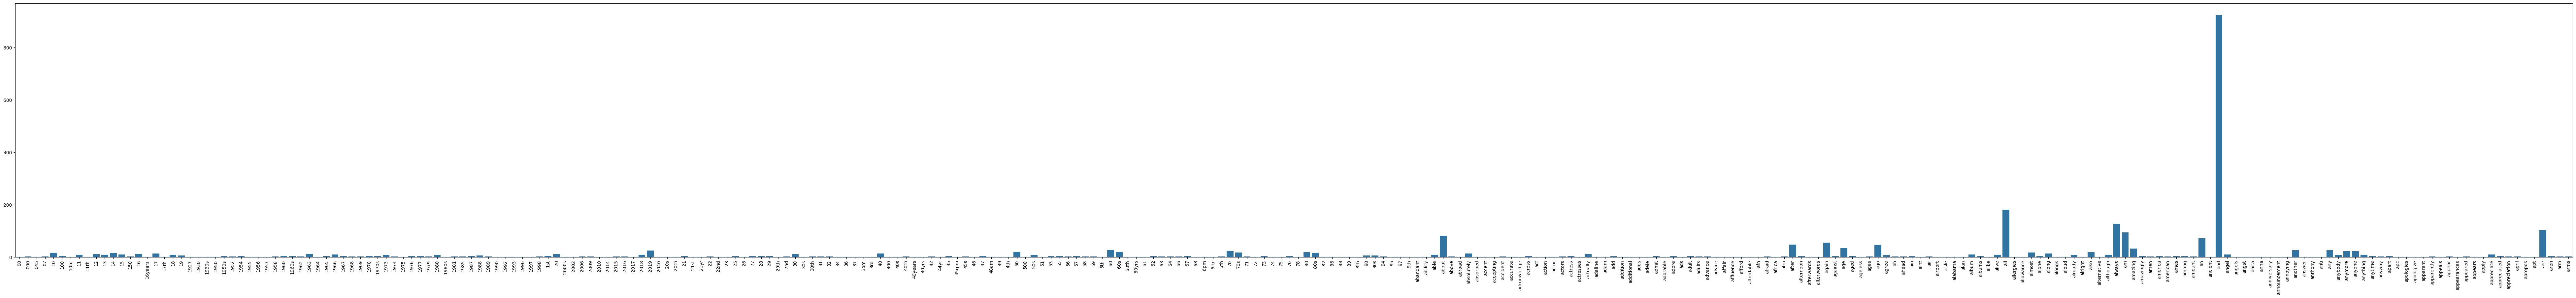

In [348]:
# Here, we are plotting the graph to see the first 300 terms frequency in the documents
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], # The first 300 terms
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

#### The First 300 Terms Graph with Plotly

In [349]:
# Here, we are using the plotly to plot the graph
import plotly.express as px
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

df_12 = pd.DataFrame({'Term': terms[:300], 'Frequency': term_frequencies[:300]})
fig_12 = px.bar(df_12, x = 'Term', y = 'Frequency')
fig_12.update_layout(xaxis_tickangle=-90)
fig_12.show()

#### Terms That Appear in 100 or more Graph

In [350]:
# For this part, I only include the terms that appears in 100 or more in order to visualize the most frequent terms
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
threshold = 100
filtered_index = np.where(term_frequencies > threshold)[0]
filtered_term_frequencies = term_frequencies[filtered_index]
filtered_feature_names_13 = count_vect.get_feature_names_out()[filtered_index]

filtered_data = pd.DataFrame({'Term': filtered_feature_names_13, 'Frequency': filtered_term_frequencies})
fig_13 = px.bar(filtered_data, x = 'Term', y = 'Frequency')
fig_13.update_layout(xaxis_tickangle=-45)
fig_13.show()


#### Sorted First 300 Terms Graph

In [351]:
# Here, we sort the terms based on the frequencies (The first 300 terms with the most frequency)
top_index = np.argsort(term_frequencies)[::-1][:300]
#print(top_index)
top_terms = np.array(terms)[top_index]
top_frequencies = term_frequencies[top_index]
#print(top_terms)
#print(top_frequencies)

df_14 = pd.DataFrame({'Term': top_terms, 'Frequency': top_frequencies})
fig_14 = px.bar(df_14, x = 'Term', y = 'Frequency')
fig_14.update_layout(xaxis_tickangle=-90)
fig_14.show()

#### Log Distribution Graph

<ipython-input-352-ed58a7e076aa>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



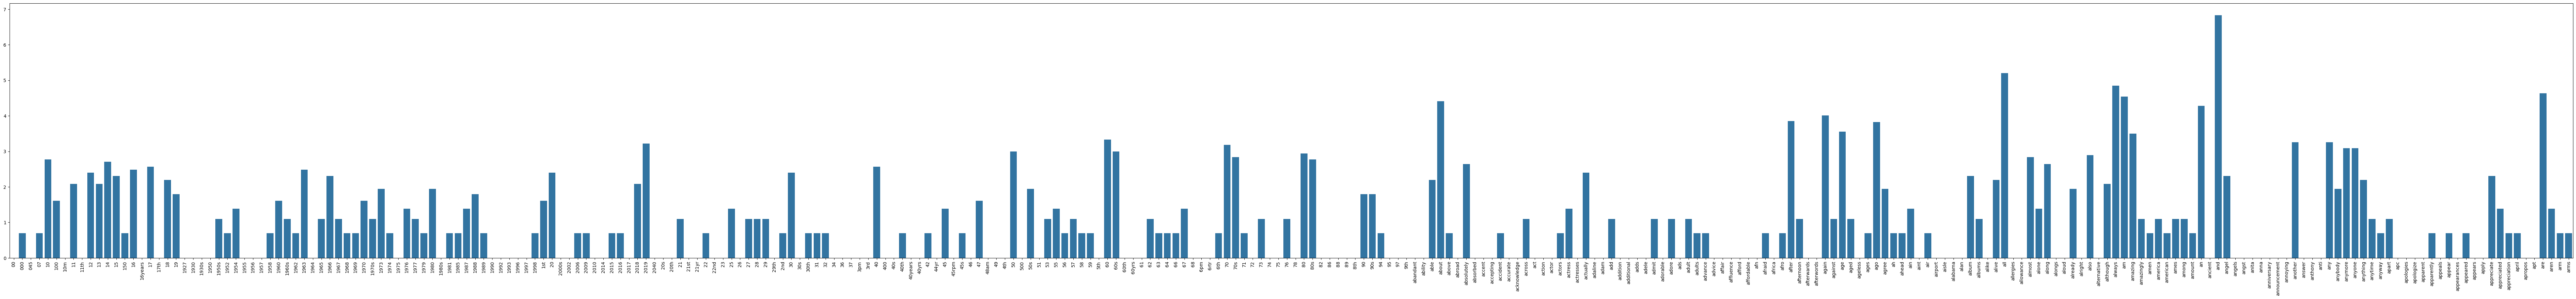

In [352]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [353]:
filtered_term_frequencies_log = [math.log(i) for i in top_frequencies]
#print(len(filtered_term_frequencies_log))
log_data = pd.DataFrame({
    'Term': top_terms,
    'Log Frequency': filtered_term_frequencies_log
})

fig_15 = px.bar(log_data, x = 'Term', y = 'Log Frequency')
fig_15.update_layout(xaxis_tickangle=-45)
fig_15.show()

#### Finding Frequent Patterns

In [354]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    df_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)

    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [355]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


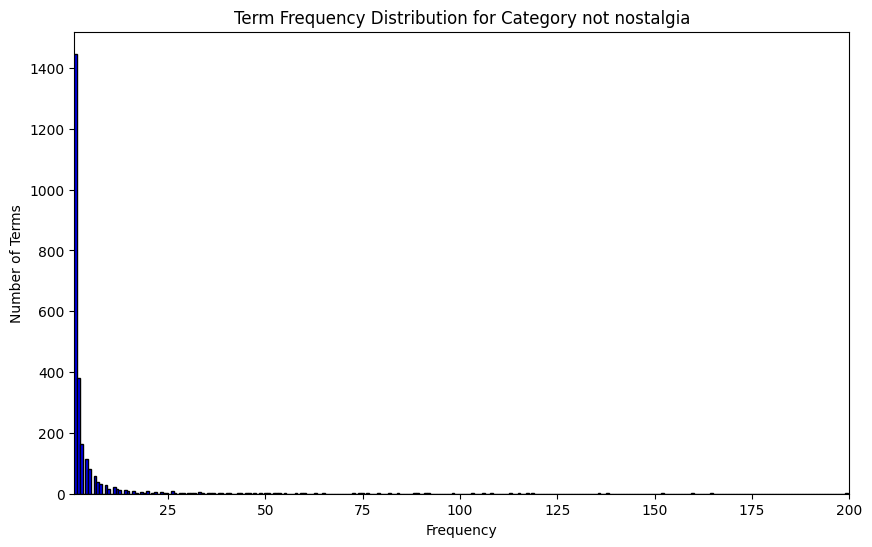

In [356]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=1000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

#### Filterting top 5% and bottom 1%

In [357]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'what', 'not', 'be', 'can', 'me', 'voice', 'just', 'as', 'beautiful', 'songs', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'never', 'much', 'about', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'an', 'singer', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'heard', 'man', 'video', 'some', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those',

In [358]:
# Frequency of top 5% words
print(sorted_counts)
# Indices to corresponding words after sorted in a descending order
print(sorted_indices)
# Sum the column corresponding to the top 5% words, here we pick 'the'
print(filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0))

[708 452 451 ...   1   1   1]
[2276 2290  160 ... 1509 1510    0]
708


In [359]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [360]:
# Frequencies sorted in ascending order
print(sorted_counts)
# Indices corresponding to words after being sorted in ascending order
print(sorted_indices)
# Sum the column corresponding to bottom 1% words, here we pick '00'
print(filt_term_document_dfs[categories[category_number]].loc[:,'00'].sum(axis=0))

[  1   1   1 ... 451 452 708]
[   0 1510 1509 ...  160 2290 2276]
1


#### Top 5% and Bottom 1% of All Categories

In [361]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

,000,045,10,100,10m,11,12,14,15,150,...,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### PAMI

In [362]:
!pip install pami

In [363]:
import PAMI.extras
print(dir(PAMI.extras))
# Note PAMI just updated again recently with different directory

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'convert', 'dbStats', 'graph']


In [364]:
#from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code
                                                      #gives you trouble
from PAMI.extras.convert import denseDF2DB as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')

    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code
                                                         #gives you trouble
    #obj = DF2DB(term_document_dfs[category])
    obj = db.denseDF2DB(term_document_dfs[category])

    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


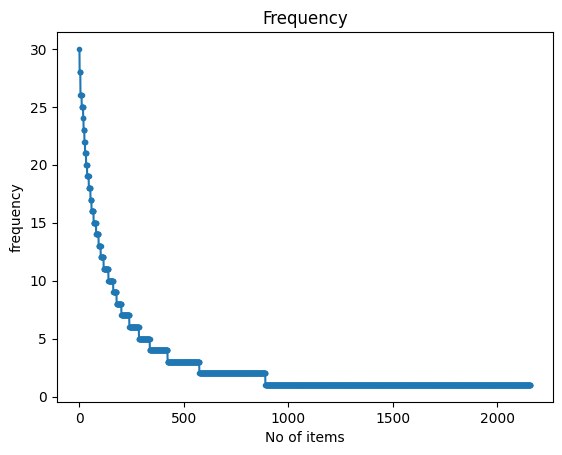

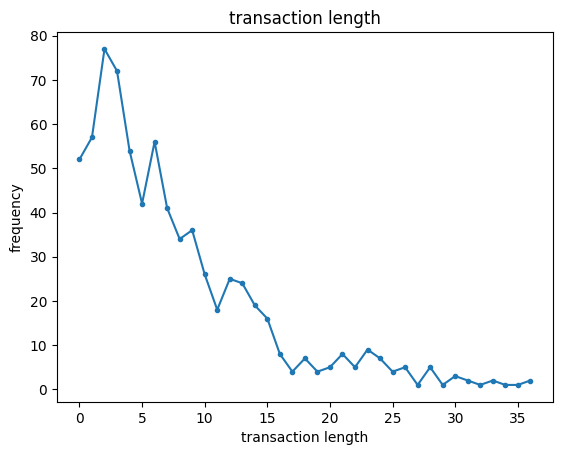

In [365]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('/content/td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


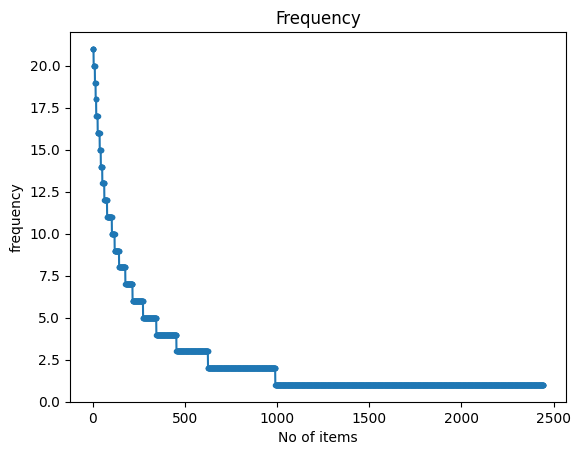

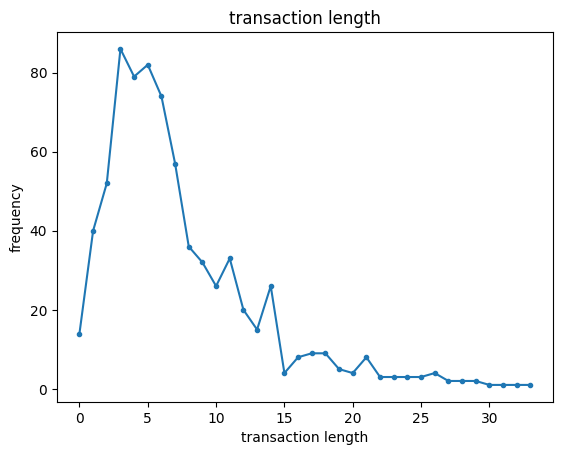

In [366]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('/content/td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

#### PAMI FPGrowth Algorithm

In [367]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 2
obj1 = alg.FPGrowth(iFile='/content/td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 3805
Runtime: 0.08226323127746582


In [368]:
obj1.save('/content/freq_patterns_nostalgia_minSup2.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,gentle,2
1,gentle no,2
2,jesus,2
3,jesus town,2
4,job,2
...,...,...
3800,will,28
3801,will go,2
3802,will favorite,3
3803,go,28


In [369]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 2
obj2 = alg.FPGrowth(iFile='/content/td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2113
Runtime: 0.08921051025390625


In [370]:
obj2.save('/content/freq_patterns_not_nostalgia_minSup2.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,lord,2
1,relaxed,2
2,2nd,2
3,2nd came,2
4,marry,2
...,...,...
2108,classic,21
2109,them,21
2110,them every,4
2111,lyrics,21


#### Unique Patterns

In [371]:
# Since I used df for the dataset, running the code after this overwrites the data so I made a copy
X = df.copy()

In [372]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

          Patterns  Support
3287          will       28
3283          ever       28
3284         would       28
3263          only       26
3273            or       26
...            ...      ...
1746   left us too        2
1747    left about        2
1748    left karen        2
1751  together has        2
2444   think later        2

[4888 rows x 2 columns]
Number of patterns discarded: 1030


In [373]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(X['comment'])  # df_copy['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
#for pattern in final_pattern_df['Patterns']:
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,player get,player get record,left record,left home,record left home,left us too,left about,left karen,together has,think later
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### FAE TopK and MaxFPGrowth Algorithm

In [374]:
#FAE TOPK
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg
from PAMI.frequentPattern.topk import FAE as FAE_TopK
inputFile = "/content/td_freq_db_nostalgia.csv"
minimumSupportCountListfae = [40, 60, 75]
seperator = '\t'

resultfae = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])

for minSupCount in minimumSupportCountListfae:
    objfae = FAE_TopK.FAE(inputFile, k=minSupCount, sep=seperator)
    objfae.mine()
    #store the results in the data frame
    resultfae.loc[resultfae.shape[0]] = ['FAE', minSupCount, len(objfae.getPatterns()), objfae.getRuntime(), objfae.getMemoryRSS()]

print(resultfae)



 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
  algorithm  minSup  patterns   runtime      memory
0       FAE      40        40  0.027994  2446168064
1       FAE      60        60  0.011590  2446168064
2       FAE      75        75  0.014091  2446168064


In [375]:
#MaxFpGrowth
seperator='\t'
minimumSupportCountList = [2, 5, 8]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])

for minSupCount in minimumSupportCountList:
    objmax = alg.MaxFPGrowth(inputFile, minSup=minSupCount, sep=seperator)
    objmax.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(objmax.getPatterns()), objmax.getRuntime(), objmax.getMemoryRSS()]
print(result)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
     algorithm  minSup  patterns   runtime      memory
0  MaxFPGrowth       2      1836  0.134775  2446168064
1  MaxFPGrowth       5       319  0.052458  2446168064
2  MaxFPGrowth       8       197  0.080471  2446168064


#### 5.5 Dimensionality Reduction

#### PCA, t-SNE, UMAP Algorithm

In [376]:
!pip install umap-learn

In [377]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [378]:
# Checking the shape
print(X_pca_tdm.shape)
print(X_tsne_tdm.shape)
print(X_umap_tdm.shape)

(1499, 2)
(1499, 2)
(1499, 2)


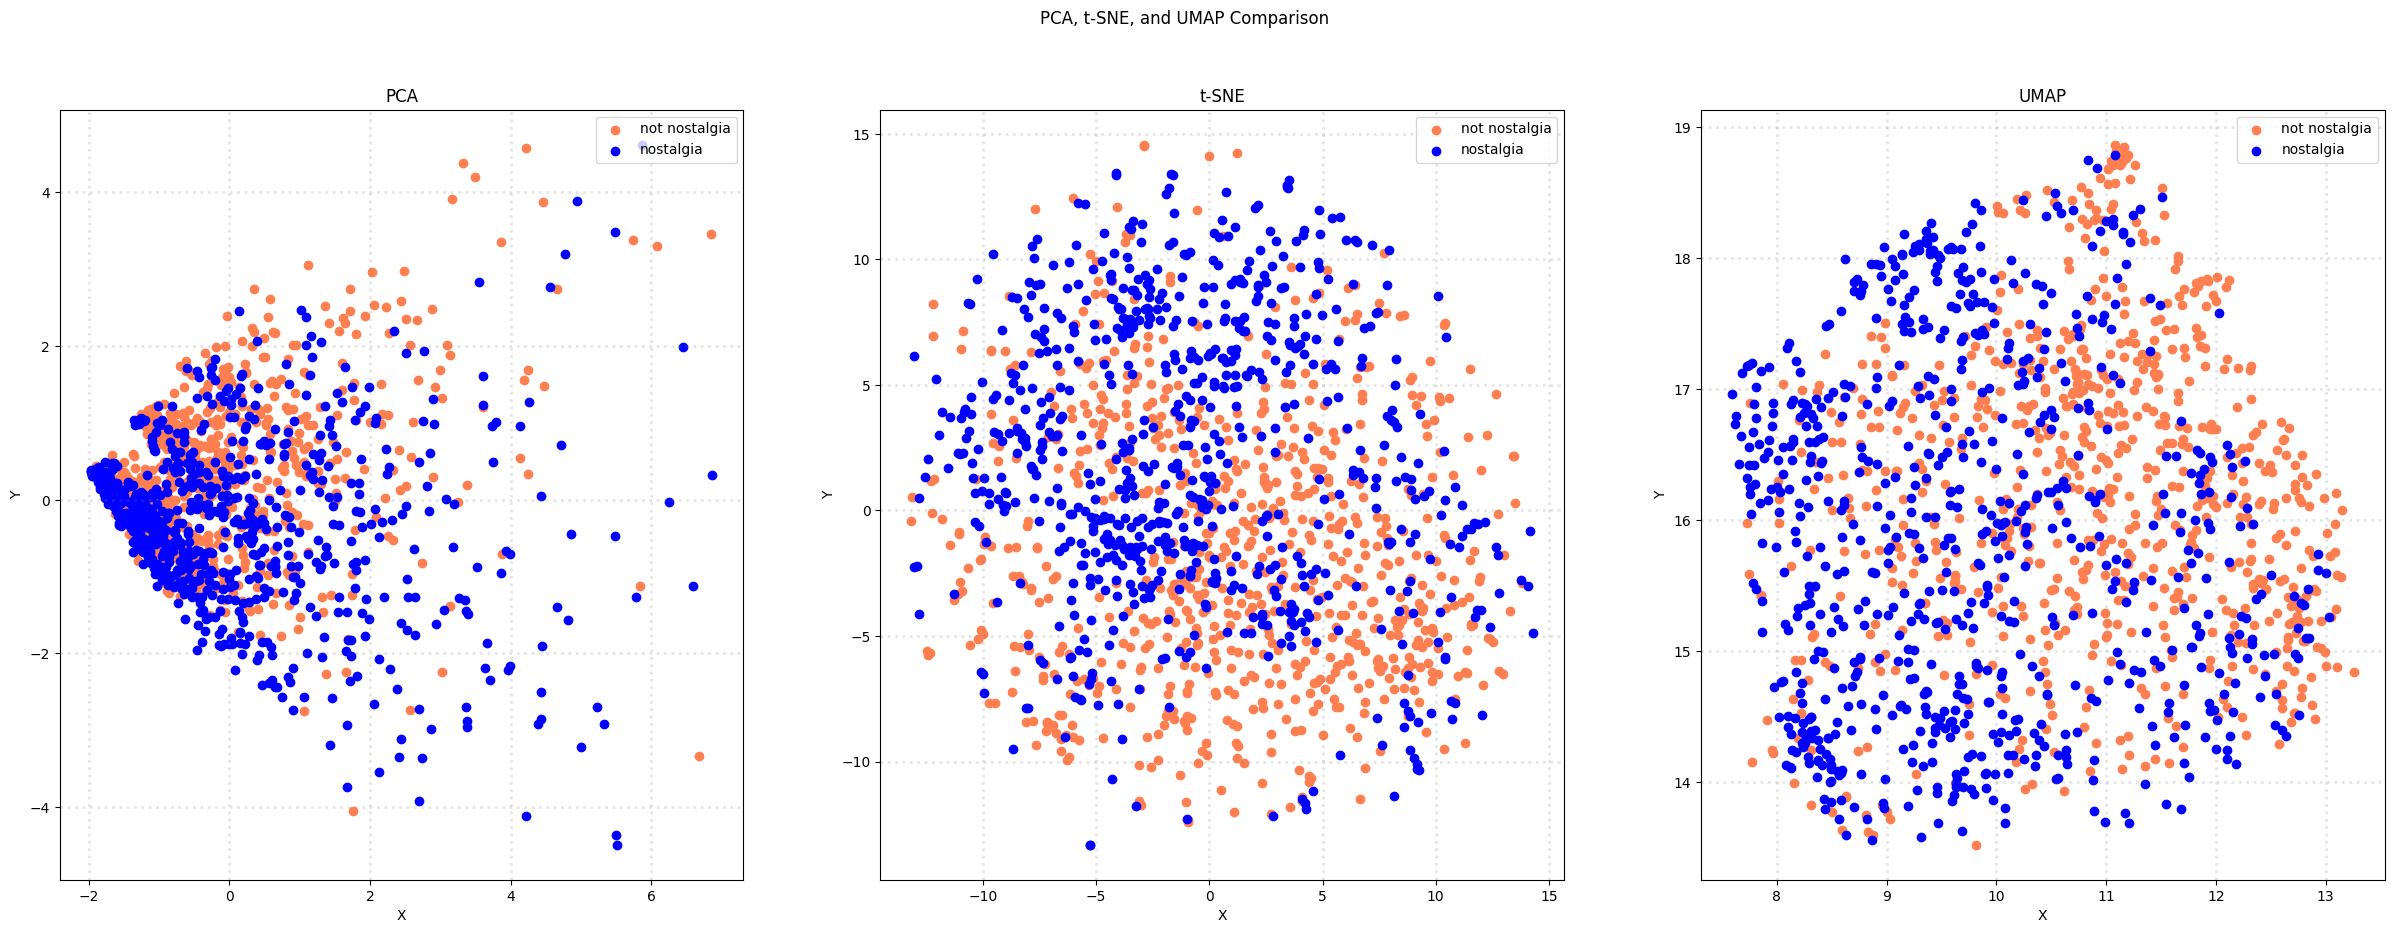

In [379]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

#### PCA, t-SNE, UMAP using Augmented Dataframe

In [380]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

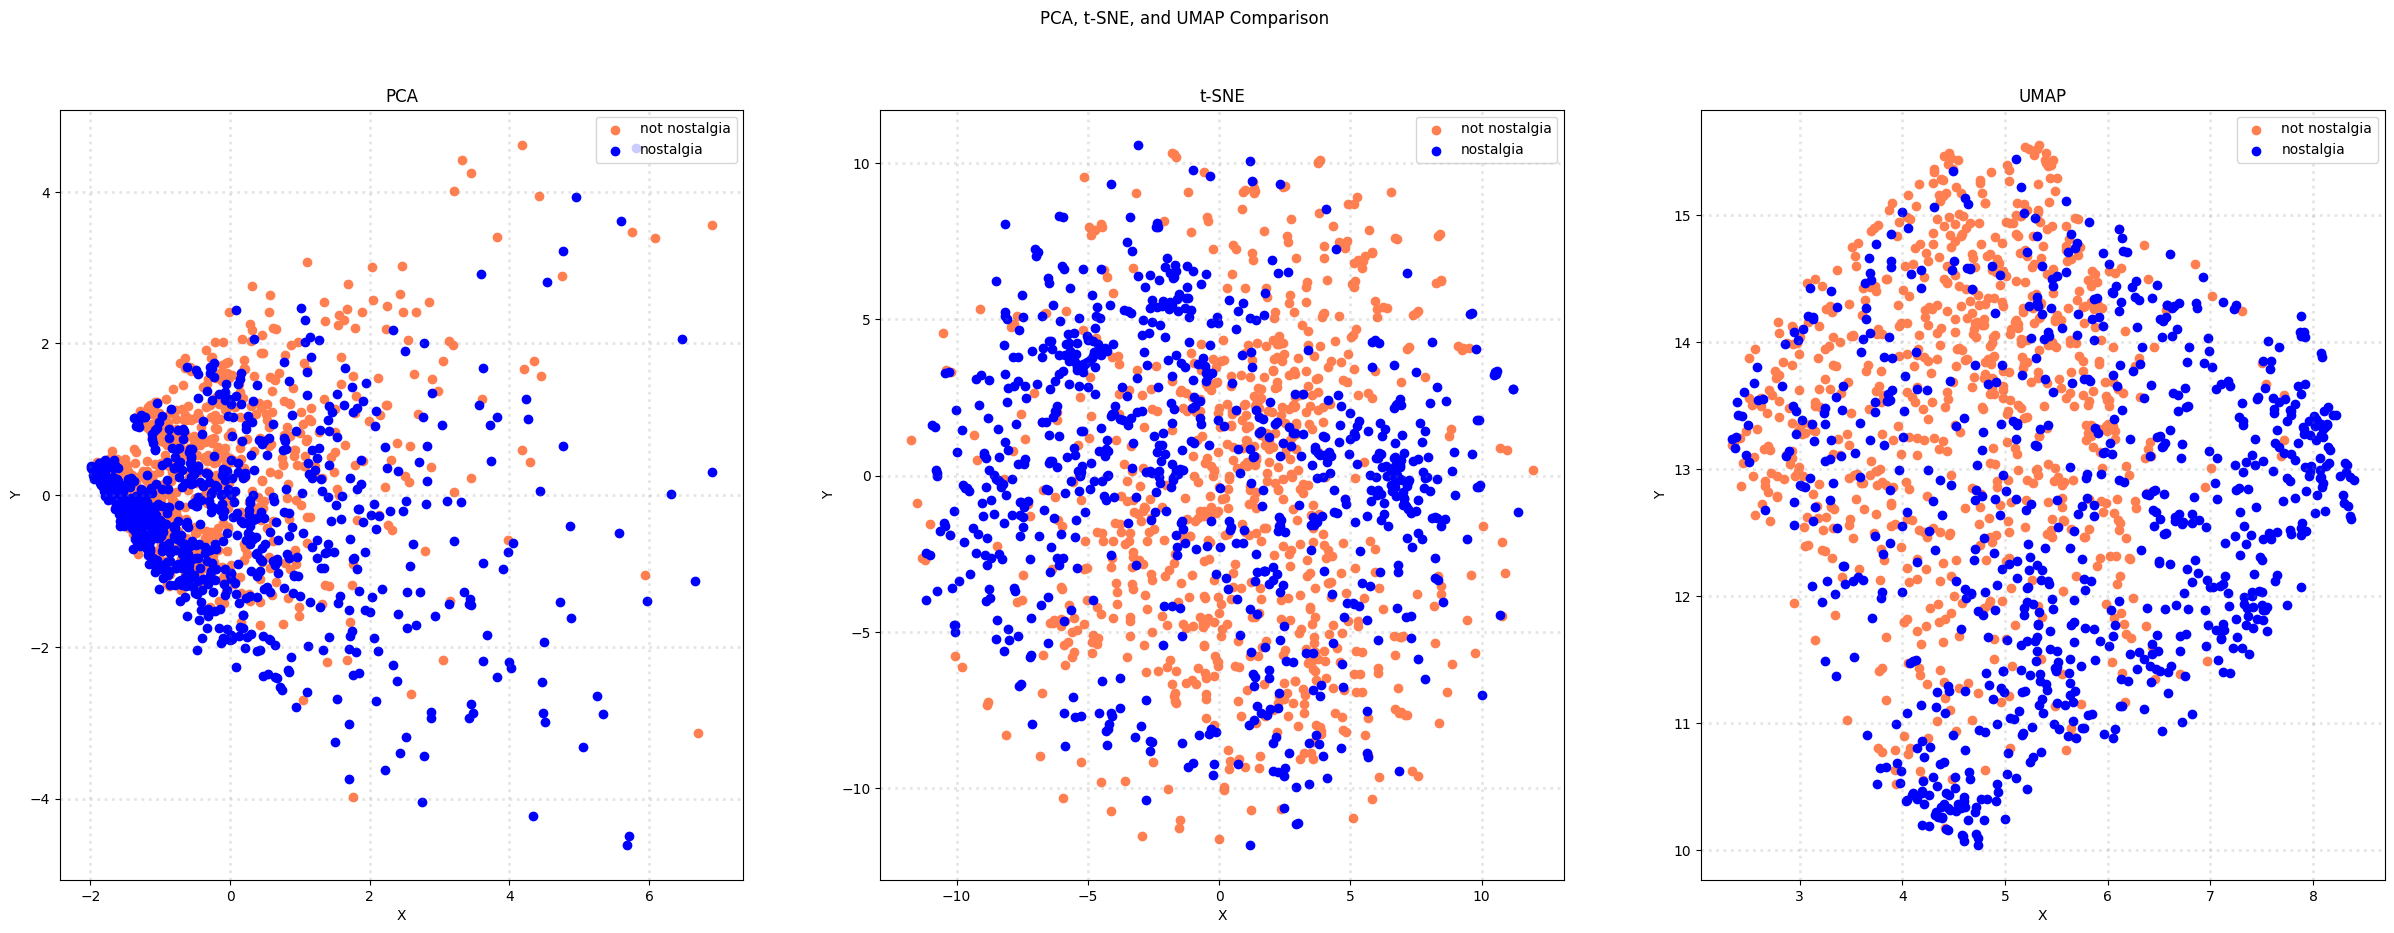

In [381]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

#### 3D Plot

In [382]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

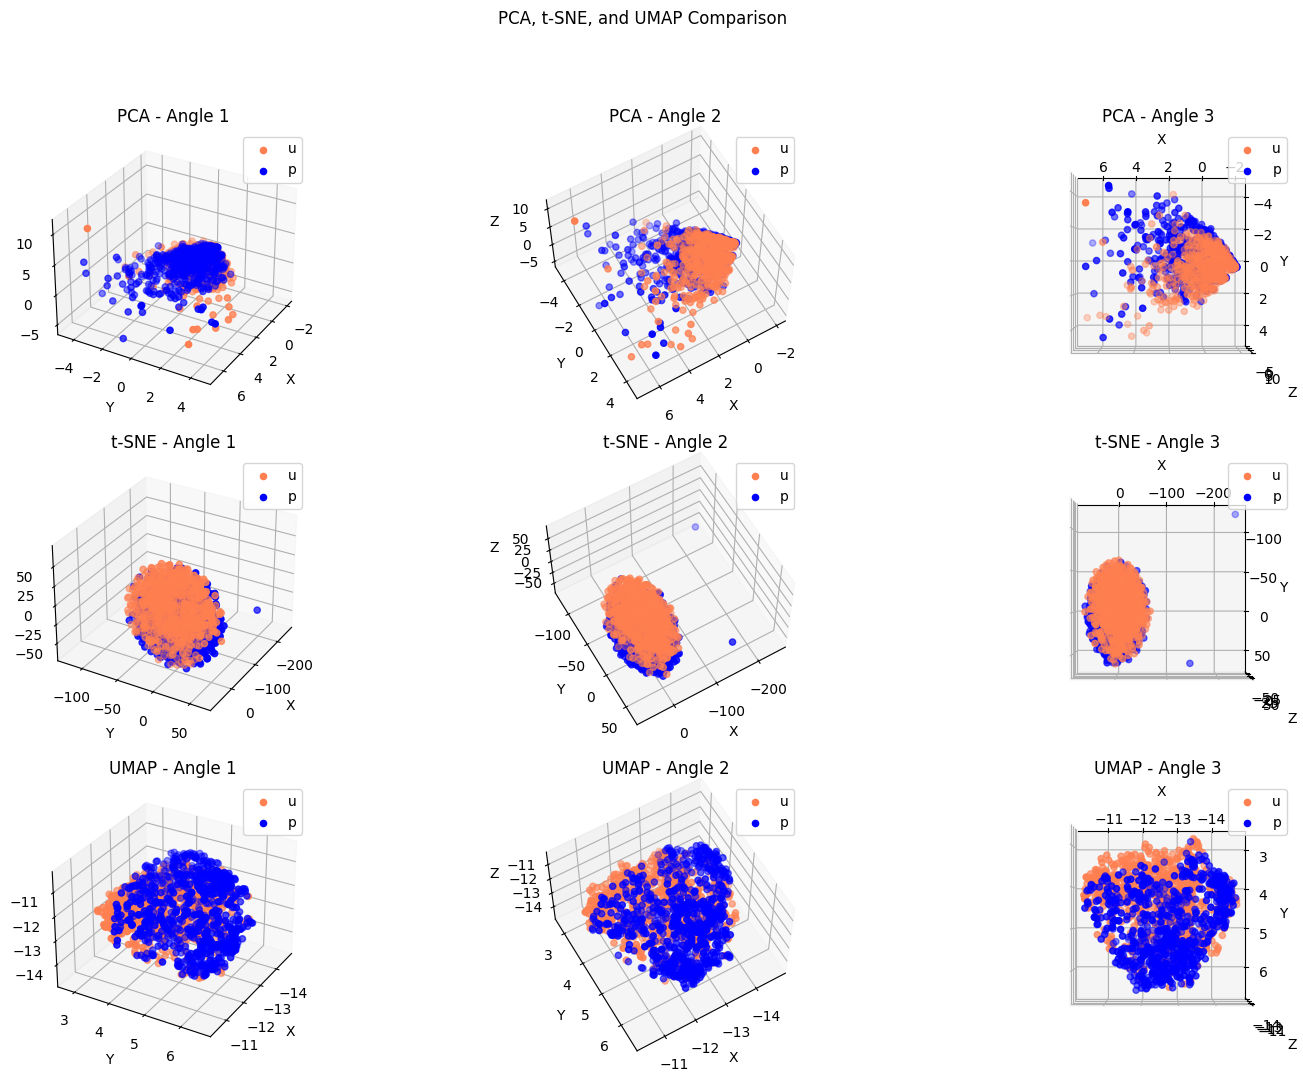

In [383]:
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()

#Function for plotting the scatter graph
def plot_3d_scatter(ax, X_reduced, title, elev, azim):
  for c, category in zip(col, categories):
    xs = X_reduced[X['sentiment'] == category].T[0]
    ys = X_reduced[X['sentiment'] == category].T[1]
    zs = X_reduced[X['sentiment'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, label=category, marker='o')

  ax.set_title(title)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.view_init(elev=elev, azim=azim)
  ax.legend('upper right')

fig = plt.figure(figsize=(18,12))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# PCA 3D plots with different angles
ax1 = fig.add_subplot(3, 3, 1, projection='3d')
plot_3d_scatter(ax1, X_pca_3d, 'PCA - Angle 1', elev=30, azim=30)
ax2 = fig.add_subplot(3, 3, 2, projection='3d')
plot_3d_scatter(ax2, X_pca_3d, 'PCA - Angle 2', elev=60, azim=60)
ax3 = fig.add_subplot(3, 3, 3, projection='3d')
plot_3d_scatter(ax3, X_pca_3d, 'PCA - Angle 3', elev=90, azim=90)

# t-SNE 3D plots with different angles
ax4 = fig.add_subplot(3, 3, 4, projection='3d')
plot_3d_scatter(ax4, X_tsne_3d, 't-SNE - Angle 1', elev=30, azim=30)
ax5 = fig.add_subplot(3, 3, 5, projection='3d')
plot_3d_scatter(ax5, X_tsne_3d, 't-SNE - Angle 2', elev=60, azim=60)
ax6 = fig.add_subplot(3, 3, 6, projection='3d')
plot_3d_scatter(ax6, X_tsne_3d, 't-SNE - Angle 3', elev=90, azim=90)

# UMAP 3D plots with different angles
ax7 = fig.add_subplot(3, 3, 7, projection='3d')
plot_3d_scatter(ax7, X_umap_3d, 'UMAP - Angle 1', elev=30, azim=30)
ax8 = fig.add_subplot(3, 3, 8, projection='3d')
plot_3d_scatter(ax8, X_umap_3d, 'UMAP - Angle 2', elev=60, azim=60)
ax9 = fig.add_subplot(3, 3, 9, projection='3d')
plot_3d_scatter(ax9, X_umap_3d, 'UMAP - Angle 3', elev=90, azim=90)

plt.show()

#### 5.6 Discretization and Binarization

In [384]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

LabelBinarizer()

In [385]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [386]:
X[0:9]

,sentiment,comment,category,unigrams,tokenized_comment,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{feel, age, golden, many, his, singer, time., ...",[0]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{angel, his, him, I, The, and, mist, Never, st...",[1]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{up, age, his, voice,, the, grow, I, graduated...",[1]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{day, pray, from, the, hope, is, 30, reality.,...",[0]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m...","{everyday, his, mum, to, me, who, him, my, pla...",[1]
5,nostalgia,"Every time I heard this song as a child, I use...",1,"[Every, time, I, heard, this, song, as, a, chi...","{many, song., Reeves,, I, me, got, time, it, s...",[1]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1,"[My, dad, loved, listening, to, Jim, Reeves, ,...","{the, Reeves,, didn't, I, me, for, dad, it, My...",[1]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{he, comes, puts, his, ., i, the, I, and, me, ...",[1]
8,not nostalgia,Wherever you are you always in my heart,0,"[Wherever, you, are, you, always, in, my, heart]","{are, heart, Wherever, my, in, you, always}",[0]


### 6. Data Exploration

In [387]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [388]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


### Count Vectors

In [389]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


### Cosine Similarity

In [390]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


<ipython-input-390-4a26afacce62>:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-390-4a26afacce62>:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-390-4a26afacce62>:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-390-4a26afacce62>:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing th

### 7. Data Classification

### Document-term Frequency Data

In [391]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [392]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [393]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [394]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9389    0.7788    0.8514       217
    nostalgia     0.8222    0.9528    0.8827       233

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



### Augmented Data

In [395]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [396]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,player get,player get record,left record,left home,record left home,left us too,left about,left karen,together has,think later
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [397]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,player get,player get record,left record,left home,record left home,left us too,left about,left karen,together has,think later
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [398]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.88

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9137    0.8295    0.8696       217
    nostalgia     0.8538    0.9270    0.8889       233

     accuracy                         0.8800       450
    macro avg     0.8837    0.8783    0.8792       450
 weighted avg     0.8827    0.8800    0.8796       450



## Third Part

### Generate New Data Visualization

In [399]:
# Here is the data that we have
X.head(5)

,sentiment,comment,category,unigrams,tokenized_comment,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{feel, age, golden, many, his, singer, time., ...",[0]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{angel, his, him, I, The, and, mist, Never, st...",[1]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{up, age, his, voice,, the, grow, I, graduated...",[1]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{day, pray, from, the, hope, is, 30, reality.,...",[0]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m...","{everyday, his, mum, to, me, who, him, my, pla...",[1]


In [400]:
print(X['tokenized_comment'][0])

{'feel', 'age', 'golden', 'many', 'his', 'singer', 'time.', 'the', 'Although', 'fan', 'I', 'and', 'but,', 'You', 'for', 'you', 'now,', 'life.', 'Thank', 'still', 'to', 'relaxed,', 'we', 'that', 'voice', 'vouch', 'can', 'great', 'hear', 'with', 'loving.', 'have', 'those', 'all', 'now.', 'a', 'in', 'Reeves', 'days', 'of', 'emotional', 'He', '16years', 'was', 'singers', 'Jim', 'at', 'love', 'Lord'}


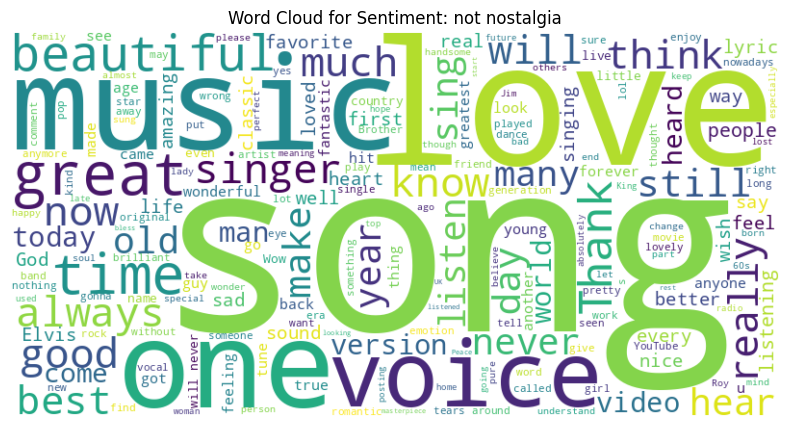

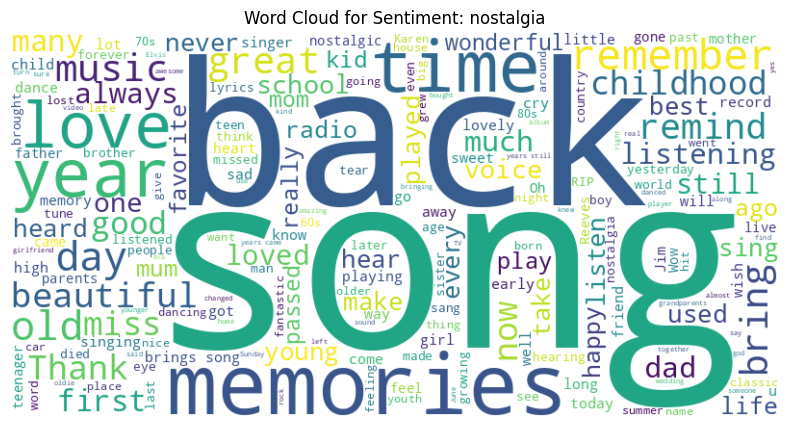

In [401]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# This is a wordcloud visualization, the one that we usually see during the data mining class slido
for sentiment in X['sentiment'].unique():
    text = " ".join(X[X['sentiment'] == sentiment]['tokenized_comment'].apply(lambda x: " ".join(x)))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Sentiment: {sentiment}")
    plt.show()

The visualization shows that the bigger the word is, the more frequently it appears inside the category. However, we know that the most frequent word was supposed to be "the" or "and" based on the data we visualized before, but for this case we do not want any "preposition" or "connecting" words like "and", "the", "in", because they are not important. By using this visualization, we can see the context of our data more clearly.

We can see that both of the categories in nostalgia and not nostalgia has the most frequent word "song" indicating context about music.

Moreover, one of the most noteable distinction we can see is that in nostalgia we can see "back" and "memories" also as frequent words. This shows that the context of the data is about nostalgia.

On the other hand, not nostalgia talks more about how great the music is with some of the frequent words "love", "great", and "voice".

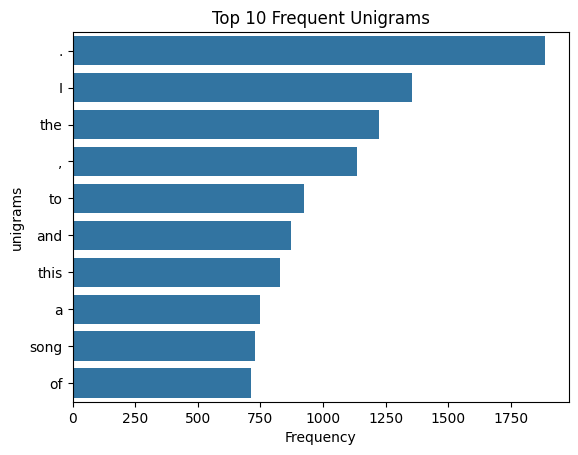

In [402]:
top_n_words = 10
freq_words = X['unigrams'].explode().value_counts().head(top_n_words)
sns.barplot(x=freq_words.values, y=freq_words.index)
plt.title(f'Top {top_n_words} Frequent Unigrams')
plt.xlabel('Frequency')
plt.show()

In this visualization, we can check for the most frequent unigrams which is an each individual words (can also be punctuation). Based on the visualization, most used unigrams are ".", "I", and "the". These are some of the most common unigrams that are used in sentences, especially in youtube comments which are the data that we used.

### Generate TF-IDF Features

In [403]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizer
tfidf_vect = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)

# Fit Transform
X_tfidf = tfidf_vect.fit_transform(X['tokenized_comment'])
print(X_tfidf)

  (0, 3375)	0.14416636969116733
  (0, 2115)	0.1566934476677717
  (0, 3595)	0.18539538775479905
  (0, 4332)	0.11308392346266771
  (0, 3850)	0.11275888798749896
  (0, 5492)	0.1423633661602639
  (0, 5990)	0.14608577434894252
  (0, 5895)	0.051158803860760424
  (0, 571)	0.19937350716696411
  (0, 3339)	0.21456569106404094
  (0, 1129)	0.053356541212916546
  (0, 2186)	0.0577443116032429
  (0, 2565)	0.22662440581843082
  (0, 2032)	0.14608577434894252
  (0, 3455)	0.08399543712373486
  (0, 6518)	0.08996347389867133
  (0, 4693)	0.16478087872298317
  (0, 4178)	0.16875216242216157
  (0, 1827)	0.13210765493677745
  (0, 5713)	0.11149314590496157
  (0, 6009)	0.055587551735498196
  (0, 5174)	0.22662440581843082
  (0, 6317)	0.11027908142004982
  (0, 5888)	0.0825561022224527
  (0, 6249)	0.11844095669423299
  :	:
  (1498, 6492)	0.1095411494278073
  (1498, 5589)	0.0706284345723117
  (1498, 5947)	0.059874128195820685
  (1498, 1845)	0.10615456016999626
  (1498, 4137)	0.18238388012374834
  (1498, 3089)	0.18476

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



### Implement Naive Bayes Classifiers

In [404]:
# Naive Bayes Classfiers
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.88

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9137    0.8295    0.8696       217
    nostalgia     0.8538    0.9270    0.8889       233

     accuracy                         0.8800       450
    macro avg     0.8837    0.8783    0.8792       450
 weighted avg     0.8827    0.8800    0.8796       450



In [405]:
# Naive Bayes Classfiers
#Model with the tdm data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9389    0.7788    0.8514       217
    nostalgia     0.8222    0.9528    0.8827       233

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



### Implement TF IDF

In [406]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets (70% train, 30% test)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, X['category'], test_size=0.3, random_state=42)


# # Train the Naive Bayes classifier (Bernoulli)
nb_tfidf = BernoulliNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
print("TF-IDF Bernoulli Naive Bayes Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))


TF-IDF Bernoulli Naive Bayes Accuracy: 0.88


For all the models, it has an accuracy of around 87% - 88% which means that they are relatively effective for distinguishing if a category is nostalgia or not nostalgia.

For the word frequency I used the multinomial bayes classifier for the tdm_df and augmented_df dataset and for the TF-IDF i used the bernoulli bayes classifier because it works better with binary data in the TF-IDF.

## Fourth Part

From the lab, based on the training and testing we only used accuracy to determine our model's performance (Naive Bayes Classification). However, we can use other measurements like log loss and mean absolute error or mean squared error.

Log loss can help measure the performance where the lower value means that it has better performance. Log loss penalizes incorrect prediction. It helps us understand how well the predicted probabilities are to the outcome.

MAE and MSE can help measure the average error or the average squared error where the lower value means that it has better prediction accuracy or performance. For MSE in particular, it is also sensitive to outliers. Overall, it helps us to measure the average prediction error.

For the data preprocess, we can also implement stemming which is reducing the words to base form for example "cooking" becomes "cook", this could help the dimensionality issue.

We can also implement more feature to the data like the length of the comments to better understand the data.